<a href="https://colab.research.google.com/github/richardg71/ECEN461AI/blob/main/NeuralNetworkIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_features)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [4]:
torch.manual_seed(41)

model=Model()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df= pd.read_csv(url)

In [7]:
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


<ipython-input-7-3d3e6cc10ae1>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


In [8]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
X=my_df.drop('variety', axis = 1 )
y = my_df['variety']

In [10]:
X=X.values
y = y.values


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [13]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [14]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [15]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [16]:
epochs = 100
losses = []

for i in range(epochs):
    y_pred = model.forward(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.detach().numpy())

    if i%10 == 0:
        print(f'Epoch: {i} Loss: {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


Epoch: 0 Loss: 1.125203251838684
Epoch: 10 Loss: 1.0097211599349976
Epoch: 20 Loss: 0.8162347674369812
Epoch: 30 Loss: 0.585993230342865
Epoch: 40 Loss: 0.4003389775753021
Epoch: 50 Loss: 0.26794716715812683
Epoch: 60 Loss: 0.1796349585056305
Epoch: 70 Loss: 0.12165623158216476
Epoch: 80 Loss: 0.0860651507973671
Epoch: 90 Loss: 0.06522614508867264


Text(0.5, 0, 'Epoch')

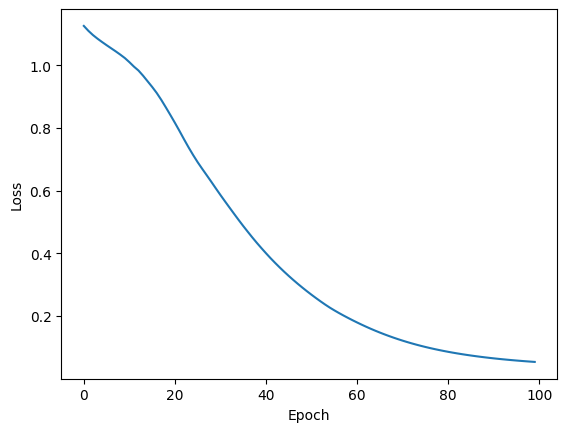

In [17]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')


In [18]:
with torch.no_grad():
    y_eval = model.forward(X_test)
    loss = criterion(y_eval, y_test)


In [19]:
loss


tensor(0.1315)

In [20]:
correct = 0
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_val = model.forward(data)
        print(f'{i+1:.2f} {str(y_val)}')
        if y_val.argmax().item() == y_test[i]:
            correct += 1
print(f'We got {correct} out of {len(y_test)}')


1.00 tensor([-5.8771,  4.4629,  6.5155])
2.00 tensor([-7.5451,  4.1668,  9.7293])
3.00 tensor([-8.4517,  5.1275, 10.2015])
4.00 tensor([-4.3411,  5.6280,  2.5636])
5.00 tensor([-7.1838,  4.8757,  8.3023])
6.00 tensor([-3.3940,  5.3421,  1.2802])
7.00 tensor([-5.9240,  4.9826,  6.0025])
8.00 tensor([-4.2895,  5.7016,  2.3920])
9.00 tensor([-6.5369,  4.9261,  7.1291])
10.00 tensor([-8.0526,  4.4129, 10.3325])
11.00 tensor([-5.6775,  4.9505,  5.6248])
12.00 tensor([ 4.5748, -2.2579, -2.8925])
13.00 tensor([ 4.2646, -2.0055, -2.7342])
14.00 tensor([-2.1081,  4.0482,  0.5803])
15.00 tensor([ 3.4608, -1.2147, -2.3488])
16.00 tensor([-5.4739,  5.1174,  5.0966])
17.00 tensor([ 4.0637, -1.8045, -2.6504])
18.00 tensor([-5.8090,  4.6057,  6.2494])
19.00 tensor([ 4.9250, -2.5763, -3.0545])
20.00 tensor([ 3.4559, -1.2559, -2.3637])
21.00 tensor([-2.6161,  4.5584,  0.8575])
22.00 tensor([-7.7427,  4.7379,  9.4233])
23.00 tensor([ 3.5776, -1.3269, -2.4109])
24.00 tensor([ 4.5445, -2.2478, -2.8698])
2

In [22]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])


In [24]:
with torch.no_grad():
    print(model(new_iris))

tensor([ 4.5445, -2.2478, -2.8698])


In [25]:
newer_iris=torch.tensor([5.9, 3.0, 5.1, 1.8])

In [26]:
with torch.no_grad():
    print(model(newer_iris))

tensor([-5.9960,  4.5080,  6.6831])


In [29]:
torch.save(model.state_dict(), 'my_iris.pt')


In [30]:
new_model = Model()
new_model.load_state_dict(torch.load('my_iris.pt'))


<ipython-input-30-fad8fd6623ec>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_model.load_state_dict(torch.load('my_iris.pt'))


<All keys matched successfully>

In [31]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)